<a href="https://colab.research.google.com/github/donw385/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Don_Wang_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

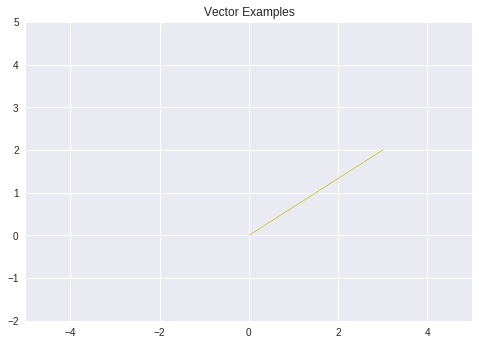

In [5]:
plt.arrow(0, 0, 3, 2, head_width=.02, head_length=0.01, color = 'y')
plt.xlim(-5,5)          
plt.ylim(-2,5)
plt.title('Vector Examples')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [7]:
#find norm of vector
#norm is length of vector. length is 17.61

b = [17,-4,-2,1]

print (np.linalg.norm(b))

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
#dot product, answer is 42

c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)


42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [10]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

E


array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [11]:
#E^-1 is inverse matrix

np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [12]:
#E^T is transposed matrix

E.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
##### Your Code Here #####

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
##### Your Code Here #####

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
##### Your Code Here #####